# Trabajo Práctico 1 - Cálculo de Ranking Page

## Enunciado

### Pregunta 1 - ¿Por que la matriz A definida en (4) es equivalente a $p \ \mathbf{W} \ \mathbf{D} + e \ z^t$ ? Justificar.

Definiciones (por enunciado):

*   $e$ es un vector columna de unos de dimension n
*   $W$ es una matriz de conectividad tal que:

$$
\begin{equation} \nonumber
w_{ij} = \begin{cases}
1 & \text{si la pagina tiene un link de i a j}\\
0 & \text{caso contrario}
\end{cases}
\end{equation}
$$
$\hspace{0.5cm}$ y definimos $c_j$ como la cantidad de links salientes que tiene una página:
$$
\begin{equation} \nonumber
c_j = \sum_{i=1}^n w_{ij}
\end{equation}
$$

*   $z$ es un vector columna de unos de dimension $n$ tal que:
$$
\begin{equation} \nonumber
z_j = \begin{cases}
\frac{1 - p}{n} & \text{si } c_j \neq 0 \\
\frac{1}{n} & \text{si } c_j = 0
\end{cases}
\end{equation}

\newline
$$
*   $D$ es una matriz diagonal de la forma

$$
\begin{equation} \nonumber
d_{jj} = \begin{cases}
\frac{1}{c_j} & \text{si } c_j \neq 0 \\
0 & \text{si } c_j = 0
\end{cases}
\end{equation}
\newline
$$
*   Formalmente, definimos la matriz $A = a_{ij}$, $A \in \mathbb{R}^{n \times n}$, donde $a_{ij}$ representa la probabilidad de pasar de la página j a la página i:

$$
\begin{equation} \nonumber
a_{ij} = \begin{cases}
\frac{1 - p}{n} + \frac{pw_{ij}}{c_j} & \text{si } c_j \neq 0 \\
\frac{1}{n} & \text{si } c_j = 0
\end{cases}
\end{equation}
$$

Luego, debemos probar que $A=pWD+e.z^t$

Notamos que todas las variables de la derecha tienen su definicion por enunciado. Notamos tambien que todas las definiciones partidas tienen como criterio que $c_j$ sea igual a cero o distinto de cero.

Por estas razones decidimos realizar la demostracion de forma algebraica, y estudiando en los dos casos ($c_j$ igual a cero o distinto de cero).

Vamos a demostrar que $\forall$ $i, j, 1 \leq i,j \leq n$:
$$a_{ij} = p. (\sum_{k=1}^{n} w_{ik} \cdot d_{kj}) + e_i . z^t_j$$

* Como la matriz D es diagonal, entonces $d_{ik} = 0 \hspace{0.2cm} \forall k \neq j$, por lo que $\sum_{k=1}^{n} w_{ik} \cdot d_{kj} = w_{ij} \cdot d_{jj}$, dejando entonces
$$a_{ij} = p. w_{ij} \cdot d_{jj} + e_i . z^t_j$$

**Caso 1**: Si ${c_j\neq 0}$


Queremos ver que: $a_{ij} = p. w_{ij} \cdot d_{jj} + e_i . z^t_j$

* Recordemos que para $c_j \neq 0$, $a_{ij} = \frac{1-p}{n}  + p \cdot w_{ij}.\frac{1}{c_j}$ por lo que queremos ver que:
$$p \cdot w_{ij}.\frac{1}{c_j} + \frac{1-p}{n}  = p. w_{ij} \cdot d_{jj} + e_i . z^t_j$$ 



* Como $d_{jj} = \frac{1}{c_j}$ (porque $c_j \neq 0$), $e_i = 1$ y $z^t_j = \frac{1-p}{n}$ (porque $c_j \neq 0$), entonces queda:
$$p \cdot w_{ij}.\frac{1}{c_j} + \frac{1-p}{n}  = p \cdot w_{ij}.\frac{1}{c_j} + \frac{1-p}{n} $$

**Caso 2**: Si ${c_j = 0}$

*  Queremos ver que $a_{ij} = p. w_{ij} \cdot d_{jj} + e_i . z^t_j$

* Recordemos que $a_{ij} = \frac{1}{n}$ por lo que queremos ver que:
$$\frac{1}{n} = p. w_{ij} \cdot d_{jj} + e_i . z^t_j$$ 

* Pero $d_{jj} = 0$ cuando $c_j = 0$, por lo que 

$$e_i.z^t_j = \frac{1}{n} \newline$$

* Que es verdadero (porque $e_i=1$ y $z^t_j= \frac{1}{n}$ para ${c_j = 0}$


De esta manera, demostramos la igualdad para cada indice de la matriz en todos los casos (cuando $c_j = 0$ y cuando $c_j \neq 0$). Concluyendo, queda demostrado algebraicamente que $A=pWD+e.z^t$

### Pregunta 2 -  ¿Cómo se garantiza existencia de la factorización $LU$? ¿ La matriz $(\mathbf{I} - p \ \mathbf{W} \ \mathbf{D})$ está bien condicionada? ¿Cómo influye el valor de $p$?

La existencia de la factorización $LU$ se garantiza asegurándonos de que no haya pivots nulos en el proceso de eliminación de Gauss. Nos podemos asegurar de esto utilizando el concepto de matriz *diagonal dominante*. Una matriz $A \in \mathbb{R}^{n \times n}$ se dice *diagonal dominante (estrictamente diagonal dominante)* y se denota *DD (EDD)* si y solo si para todo $i, 1\leq i\leq n$
$$\sum_{1 \leq j \leq n, j \neq i}|a_{i,j}| \leq (<) |a_{i,i}|$$
Es decir, el valor absoluto de cada elemento de la diagonal es mayor o igual (mayor estricto para EDD) a la suma del valor absoluto de los elementos de su fila. $\newline$

La propiedad que nos interesa de las matrices EDD es que son invertibles, y el proceso de eliminación de Gauss no produce pivots nulos, por lo cual si $I - pWD$ es EDD, entonces garantizamos la factorización LU.

Modificamos levemente esta definición utilizando que una matriz tiene factorización LU también si el valor absoluto de cada elemento de la diagonal es mayor a la suma del valor absoluto de los elementos de su columna. Lo probamos de esta forma:

$\text{Defino } A \text{ tal que}\sum_{1 \leq i \leq n, i \neq j}|a_{i,j}| < |a_{j,j}| \implies A^{t} \text{ es EDD} \implies A^{t} \text{ tiene factorización LU } \implies \forall{1 \leq k \leq n \text{  }det(A^t(1:k,1:k)) \neq 0} \implies \forall{1 \leq k \leq n \text{  }det(A^t(1:k,1:k)^t) \neq 0}$
porque el determinante de cualquier matriz es el mismo que el de su traspuesta.

Pero vemos que $A^t(1:k,1:k)^t = (A^t)^t(1:k,1:k) = A(1:k,1:k)$ ya que:
$
A^t(1:k,1:k) = \begin{bmatrix} 
    a_{11} &  \dots & a_{k1}\\
    \vdots & \ddots & \vdots\\
    a_{1k} & \dots    & a_{kk} 
\end{bmatrix}
\implies 
(A^t)^t(1:k,1:k) = \begin{bmatrix} 
    a_{11} &  \dots & a_{1k}\\
    \vdots & \ddots & \vdots\\
    a_{k1} & \dots    & a_{kk} 
\end{bmatrix} = A(1:k,1:k) = A^t(1:k,1:k)^t \text{ porque } A^t \text{ es la matriz tal que } a_{ij} = a_{ji} \text{ para todo } 1 \leq i,j \leq n 
$

Por lo tanto, el determinante de todas las submatrices principales de $A$ es distinto de 0. Concluimos que si $A^t$ es EDD, entonces A admite factorización LU.

Sabiendo esto, probemos que $I - pWD$ tiene factorización LU

Sabemos que la matriz $WD$ tiene las siguientes características:
* $\forall 1 \leq i,j \leq n, 0 \leq (WD)_{ij} \leq 1$
* $\forall 1 \leq j \leq n, (WD)_{jj} = 0$
* $\forall 1 \leq j \leq n, \sum_{i=1}^{n}(WD)_{ij} = 1$

Si le multiplicamos el escalar $p \in (0,1)$ a $pWD$, entonces los elementos distintos de cero serán más pequeños que antes, por lo que la matriz resultante tendrá estas características:
* $\forall 1 \leq i,j \leq n, 0 \leq (pWD)_{ij} < 1$
* $\forall 1 \leq j \leq n, (pWD)_{jj} = 0$
* $\forall 1 \leq j \leq n, \sum_{i=1}^{n}(pWD)_{ij} < 1$

Entonces, todos los elementos son positivos, la suma de los elementos de cada columna es menor que 1 y la diagonal es de ceros.

Ahora llegamos a la ecuación que nos interesa, $I-pWD$

Como $pWD$ tiene diagonal de ceros, entonces $I-pWD$ tiene diagonal de unos. Además, por lo visto antes de $pWD$, la suma de los valores absolutos del resto de los elementos de cada columna será menor que uno, por lo cual probamos que $I-pWD$ tiene factorización LU.

In [2]:
from funciones import *
import time
import matplotlib.pyplot as plt
import numpy as np

archivos_test = ['./tests/test_dosestrellas.txt', './tests/instagram_famosos_grafo.txt', './tests/mathworld_grafo.txt', './tests/test_todosconectados.txt', './tests/test_aleatorio.txt', './tests/test_extra.txt','./tests/test_ningunoconectado.txt'] 

Respecto a si esta bien condicionada, antes que nada tengamos en cuenta que una matriz se considera bien condicionada si su número de condición es cercano a 1. El número de condición de una matriz es una medida de cuánto se amplifican los errores de redondeo al resolver un sistema de ecuaciones lineales representado por esa matriz.

Para chequear esto, deberiamos calcular el numero de condicion de $I-pWD$.

Para calcular el numero de condición, $κ(A)$ podemos calcular el producto de las normas de la matriz y su inversa, es decir:

$$κ(A)=∥A∥⋅∥A^{−1}∥$$

Donde $∥A∥$ es la norma de la matriz $A$ y $∥𝐴^{-1}∥$ es la norma de la matriz inversa de $A$

En nuestro caso, $∥I-pWD∥.∥(I-pWD)^{-1}∥$

Decidimos estudiar que sucede en distintos casos:

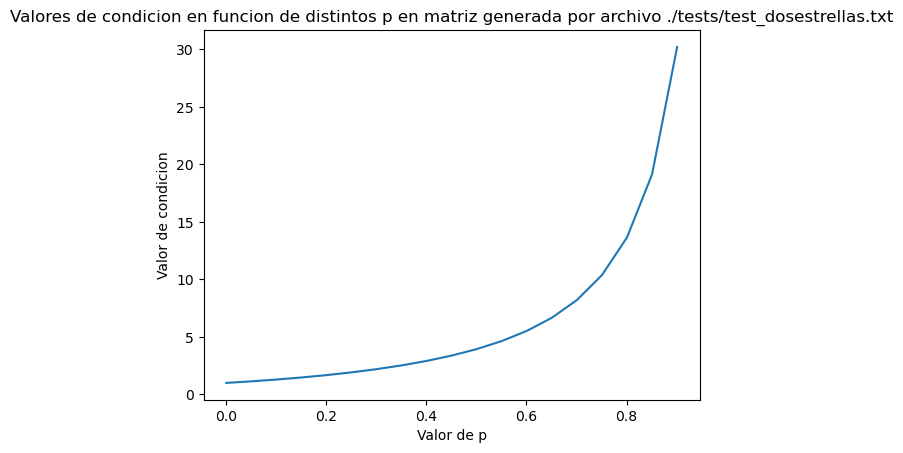

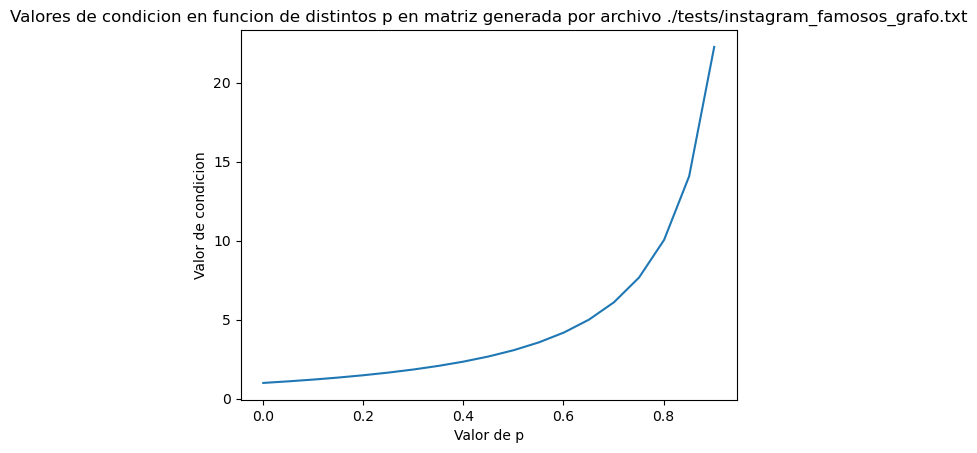

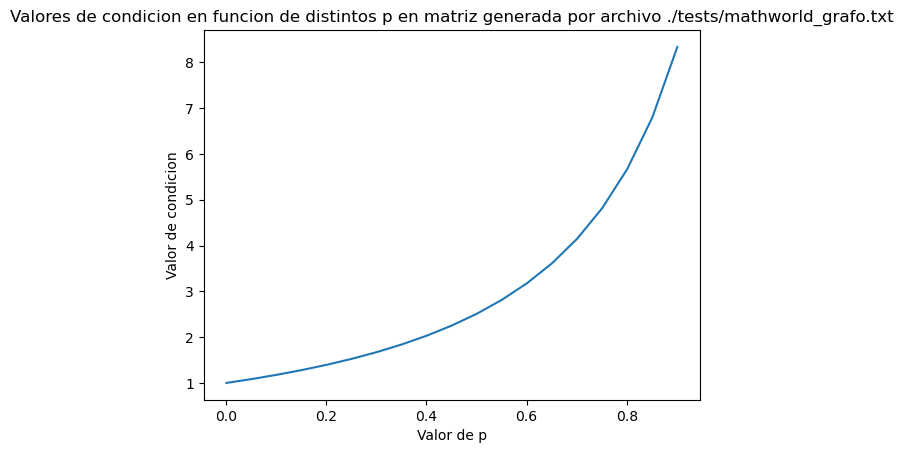

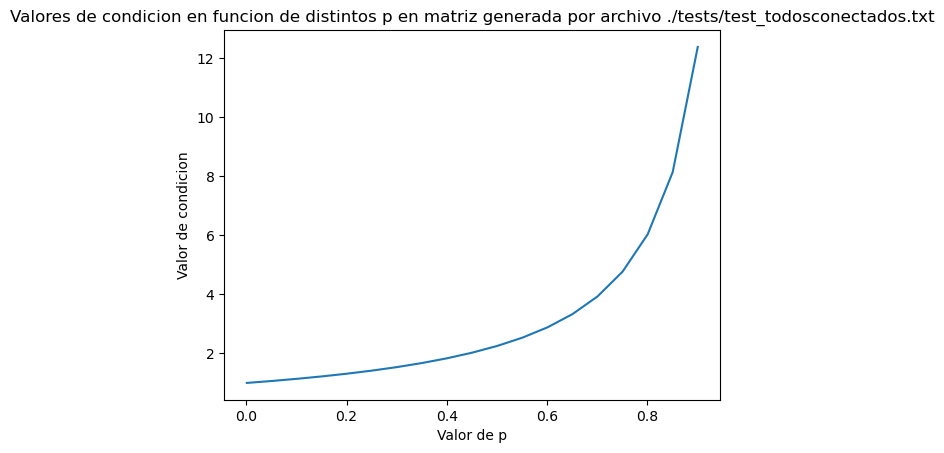

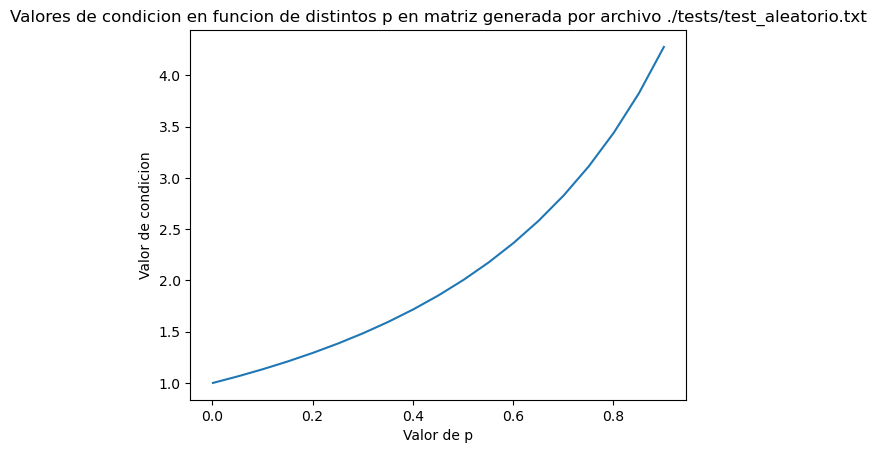

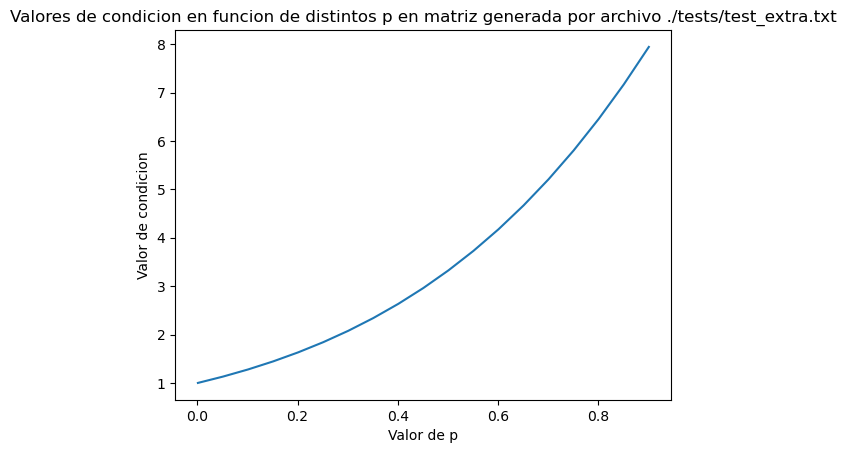

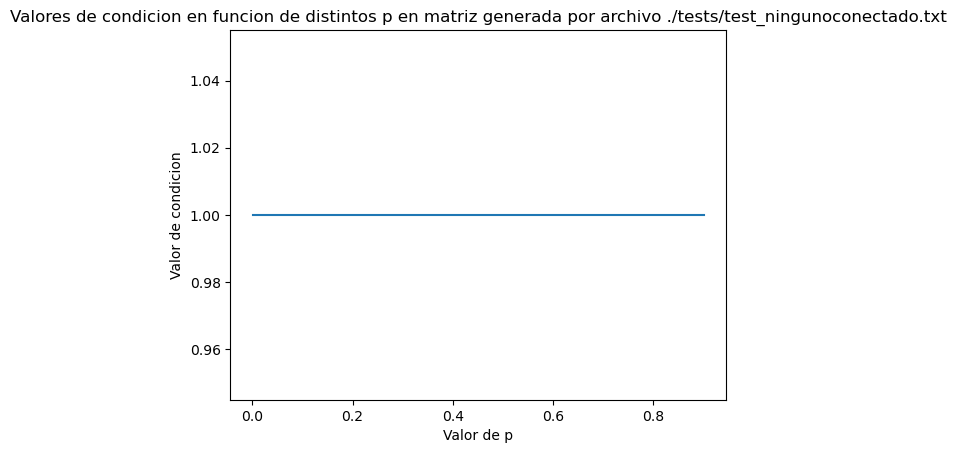

In [6]:
# Ver si I-pWD esta bien condicionada
def valores_condicion(archivo_test):
    W = leer_archivo(archivo_test)
    p=0.001
    valores = []
    variac_p = []
    ident = np.identity(np.shape(W)[0])
    D = armar_matriz_diagonal(W)
    for _ in range(19):
        matriz = ident-(p*(W@D))
        valores.append((np.linalg.cond(matriz)))
        variac_p.append(p)
        p += 0.05

    plt.title(f"Valores de condicion en funcion de distintos p en matriz generada por archivo {archivo_test}")
    plt.xlabel("Valor de p")
    plt.ylabel("Valor de condicion")
    plt.plot(variac_p, valores)
    plt.show()

def val_cond_iterativos(archivos_test):
    
    for archivo_test in archivos_test:
        valores_condicion(archivo_test)

val_cond_iterativos(archivos_test)

Veamos que en el último gráfico generado tenemos $I-pWD = I$, ya que la matriz de conectividad W es de ceros (ninguno conectado). Por lo tanto su número de condición no depende de $p$. Para el resto de las matrices, vemos que el número de condición aumenta exponencialmente a medida que aumentamos el p. Nuestra sospecha es que esto se debe a que al aumentar el p nos alejamos más de la matriz identidad y los elementos de la diagonal de $I-pWD$ son más cercanos a 0, por lo que se acerca a una matriz singular.

---

## Implementación

*Implementar la factorización $LU$ para resolver el sistema de ecuaciones (6) que permite hallar la solución buscada (es decir, el ranking de páginas). Se podrá utilizar la función **scipy.linalg.solve_triangular** para resolver sistemas triangulares.*

En el siguiente cuerpo de la notebook se genera un test que va a evaluar la función que resuelve el sistema a través de un test unitario. La resolución debe realizarse en el archivo **funciones.py** que acompaña el **template-alumnos**

In [3]:
from funciones import *
import time
import matplotlib.pyplot as plt
import numpy as np

### Test Unitario
En el archivo funciones.py hay que implementar la función que obtienen el ranking de las páginas.
Se espera que el llamado a la siguiente función arroje un valor esperado

**************************************************
Test unitario 1
0.18115942028985504
BIEN! - Paso correctamente el test unitario
**************************************************


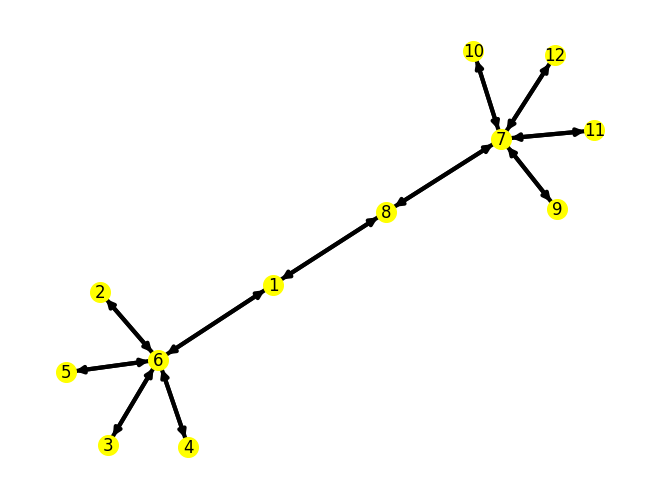

In [4]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas.txt'

#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test unitario 1')
try:
    print(obtenerMaximoRankingScore(W, p))
    # Agregamos un decimal de precisión al test para que pase
    assert(np.isclose(obtenerMaximoRankingScore(W, p), 0.18116))
except:
    print('OUCH!! - No paso el test unitario')
else:
    print('BIEN! - Paso correctamente el test unitario')
print('*'*50)


### Test Unitarios Adicionales

El grupo **deberá** proponer al menos 3 instancias de prueba no triviales, dos de las cuales deben ser de tipo TODOS LOS NODOS CONECTADOS, y otra de tipo NINGUNO CONECTADO. La tercera instancia queda a criterio del grupo.

Para el análisis, guiarse y responder las siguientes preguntas:

* ¿Cómo es el ranking obtenido en cada caso de acuerdo a la estructura del grafo páginas?
* ¿Qué conclusiones pueden sacar de la interpretación de los resultados?

Graficar los grafos usando las funciones en el **funciones.py**.

In [5]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_extra.txt'

#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

calcularRanking(W, 0.5)

(array([1, 7, 6, 5, 4, 3, 2], dtype=int64),
 array([0.31111111, 0.08888889, 0.08888889, 0.08888889, 0.08888889,
        0.08888889, 0.24444444]))

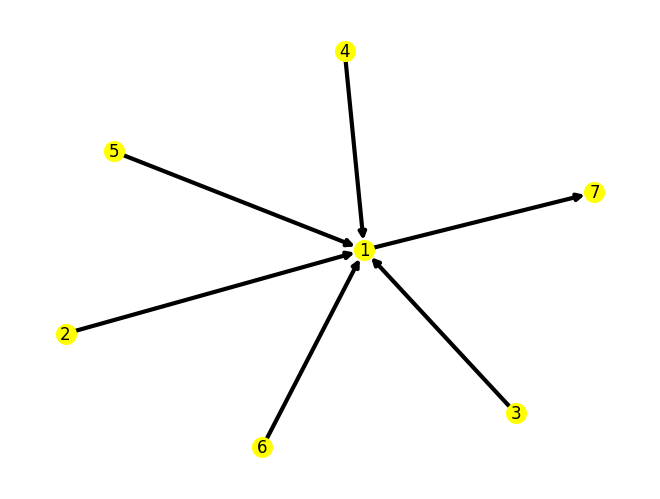

In [6]:
dibujarGrafo(W, print_ejes=False)

In [7]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_todosconectados.txt'

#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

calcularRanking(W, 0.5)

(array([5, 4, 3, 2, 1], dtype=int64), array([0.2, 0.2, 0.2, 0.2, 0.2]))

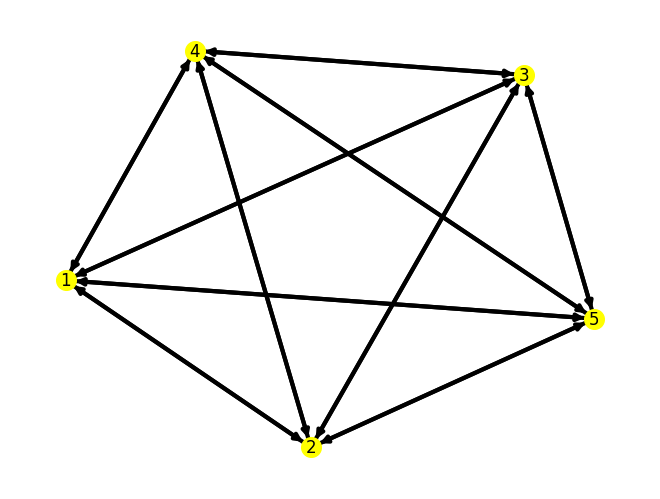

In [8]:
dibujarGrafo(W, print_ejes=False)

In [9]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_ningunoconectado.txt'

#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

calcularRanking(W, 0.5)

(array([23, 11,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 22, 13, 14, 15, 16,
        17, 18, 19, 20, 21,  1], dtype=int64),
 array([0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
        0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
        0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
        0.04347826, 0.04347826, 0.04347826, 0.04347826, 0.04347826,
        0.04347826, 0.04347826, 0.04347826]))

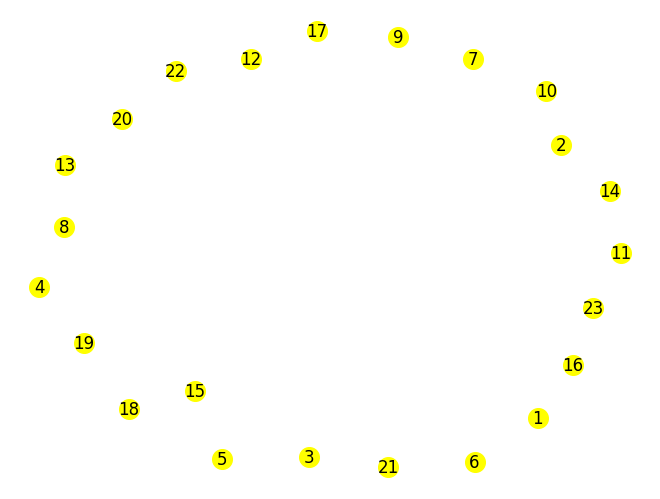

In [10]:
dibujarGrafo(W, print_ejes=False)

* **Todos los nodos conectados:** todos los nodos deberian tener el mismo puntaje, ya que todos tienen las mismas cantidades de conexiones de entrada y salida. El ranking si variaria, pero esto depende de como hayamos realizado nuestro programa, lo importante es que el puntaje de lo mismo siempre para todos.

* **Ninguno conectado:** todos los nodos deberian tener el mismo puntaje(0), ya que todos tienen las mismas cantidades de conexiones de entrada y salida (nulas). El ranking si variaria, pero esto depende de como hayamos realizado nuestro programa, lo importante es que el puntaje de lo mismo siempre para todos.

* **Test extra:** Para nuestro test extra escogimos un caso en el que todos se relacionen con el uno, excepto uno. Y este ultimo nodo sea apuntado por el 1 y no apunte a nadie.
En este caso esperamos: todas las paginas que apuntan a uno con igual puntaje (bajo), en segundo lugar el nodo que no apunta nadie y lo apunta el 1, y luego el 1 en primer lugar ya que lo apuntan varios nodos.

Elegimos este test extra para evaluar el caso donde hay una pagina dominante respecto a las demas, ya que todas la apuntan, y luego una pagina periferica, pero que recibe su valor debido a que es la unica pagina apuntada por la dominante. Nuestro objetivo es evaluar el peso que tiene la pagina dominante en los puntajes de las paginas apuntadas por ella.

Al evaluar los rankings, podemos confirmar que el peso que tiene la pagina dominante es altisimo, ya que eleva el puntaje de la pagina apuntada en gran medida. Sin embargo, esto va a depender por completo de la cantidad de paginas que apunten a 1; debido a que la cantidad de paginas apuntando a 1, va a determinar la dominancia de esta pagina respecto al resto.

Esto podria representar una pagina madre (un ejemplo podria ser una organizacion con sus suborganizaciones), que aparezca en todas las demas paginas (referenciandola, por ejemplo). Sin embargo esta pagina de inicio no deberia tener links a estas suborganizaciones, sino que solo un link a una pagina aislada. Esta pagina aislada, manteniendonos en el ejemplo de una organizacion, podria ser un link a la historia de la organizacion.

---

## Enunciado

Sobre los casos de test que se encuentran en el folder `tests`, se pide realizar los análisis siguientes para todos los grafos del folder.

### Análisis Cuantitativo

Para el análisis cuantitativo, se pide, como mínimo, estudiar los tiempos de procesamiento en función del tamaño del grafo de páginas y de la densidad del mismo. Para esto, se espera que presenten gráficos mostrando los tiempos de ejecución para obtener la solución en función de la cantidad de nodos/links de diferentes grafos de páginas aleatorios.


Para estudiar en detalle los tiempos de procesamiento, vamos a separar en dos criterios para estudiar como es la variacion de los tiempos de procesamiento respecto a cada uno.

* **Primer criterio:** cantidad de paginas. Para este caso vamos a ir aumentando la cantidad de paginas, dejando constante la cantidad de relaciones (cero) y calculando su tiempo de procesamiento en cada caso.

In [11]:
def tiempo_ejecucion(W, p):
    tiempo_inicio = time.time()
    calcularRanking(W, p)
    return time.time() - tiempo_inicio

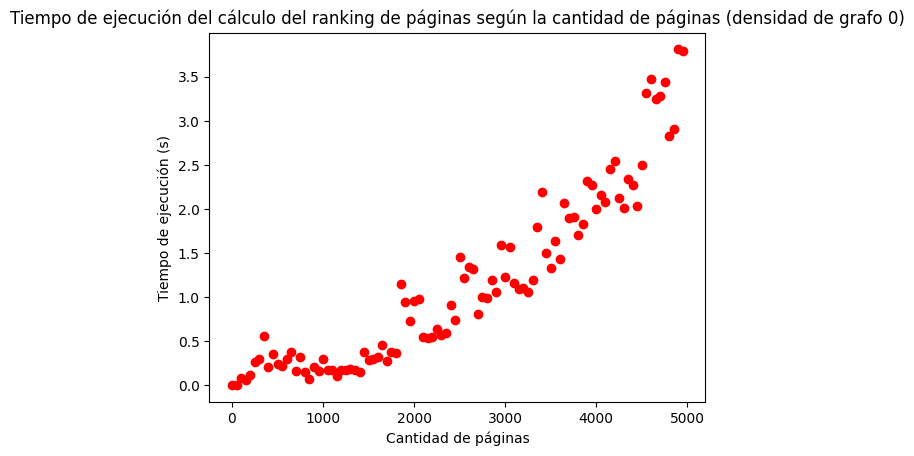

In [12]:
def graficoCantPaginas(cant_iteraciones, salto):
    # Defino p arbitrario
    p = 0.5

    tiempos_ejecucion = np.zeros(cant_iteraciones)
    cant_nodos = np.arange(1, cant_iteraciones*salto, salto)

    for i in range(1, cant_iteraciones*salto, salto):
        # Creo una matriz de conectividad de tamaño ixi sin conexiones (todos ceros)
        W = np.zeros((i,i)) 
        # Guardo el tiempo de ejecución para calcular el ranking
        tiempos_ejecucion[i//salto] = tiempo_ejecucion(W,p)


    plt.title("Tiempo de ejecución del cálculo del ranking de páginas según la cantidad de páginas (densidad de grafo 0)")
    plt.xlabel("Cantidad de páginas")
    plt.ylabel("Tiempo de ejecución (s)")
    plt.scatter(cant_nodos, tiempos_ejecucion, color ="red")
    plt.show()

# Con estos valores el código tarda aproximadamente 1 minuto en correr en nuestras máquinas. Disminuirlos para bajar el tiempo de ejecución.
graficoCantPaginas(100, 50)

Observamos una tendencia que se asemeja a la parte positiva de una funcion cubica cuyo punto de inflexion se encuentra en el origen.

Nuestra deduccion es que esto es acorde a lo esperado ya que al aumentar la cantidad de nodos del grafo, la matriz sobre la que aplicamos la factorizacion LU es más grande. La complejidad de realizar esta operacion es de $O(\frac{2}{3}n^3)$ por lo que se condice el resultado con lo esperable.

Segundo criterio: densidad del grafo. Para este caso vamos a ir aumentando la cantidad de relaciones, dejando constante la cantidad de paginas (o nodos en el grafo)

In [13]:
def graficoCantRelaciones(tamano_grafo):
    p = 0.5
    cant_relaciones = 0
    tiempos_ejecucion = np.zeros(tamano_grafo)
    cant_relaciones = np.zeros(tamano_grafo)

    W = np.zeros((tamano_grafo, tamano_grafo))
    cnt = 0
    for i in range(0, tamano_grafo):
        for j in range(0, tamano_grafo): # Dejo i fijo y voy agregando relaciones de i a cada j. Cuando pase por todos los i, voy a tener todas las relaciones posibles en mi matriz.
            if j != i:
                # Añado una relación a la matriz de la página i a la j
                W[j, i] = 1
                cnt+=1
        cant_relaciones[i] = cnt
        tiempos_ejecucion[i] = tiempo_ejecucion(W,p)

    plt.title(f"Tiempo de ejecución del cálculo del ranking de páginas según la cantidad de relaciones (tamaño de grafo {tamano_grafo})")
    plt.xlabel("Cantidad de relaciones")
    plt.ylabel("Tiempo de ejecución (s)")
    plt.scatter(cant_relaciones, tiempos_ejecucion, color ="red")
    plt.show()

graficoCantRelaciones(300)

Observamos una tendencia constante al aumentar la cantidad de relaciones en grafos con igual cantidad de nodos.

Nuestra deducción es que la matriz sobre la cual se realiza la factorización LU tiene el mismo tamaño pero diferentes valores, y en la cantidad de operaciones no afecta qué valores tengo, ya que la complejidad del algoritmo es de $O(\frac{2}{3}n^3)$, siendo n el tamaño de la matriz, es decir no depende de los valores de la matriz.

Además, vemos varios puntos que no responden a la tendencia, y cada vez que ejecutamos el codigo nos devuelve un resultado distinto. Al tratarse de tiempos de ejecución tan bajos, pensamos que esto se debe a  factores externos (computacionales) pero esperamos en general que el valor se mantenga constante.

Por esto, finalmente concluimos que el tiempo de ejecución no depende de la cantidad de relaciones, sino de la cantidad de nodos en el grafo.

### Análisis Cualitativo

Para el análisis cualitativo se deberán estudiar los rankings obtenidos, en función de la estructura del grafo, y del valor de $p$. Para esto, se espera que presenten gráficos mostrando las probabilidades de las páginas mejor rankeadas en función del valor de $p$.


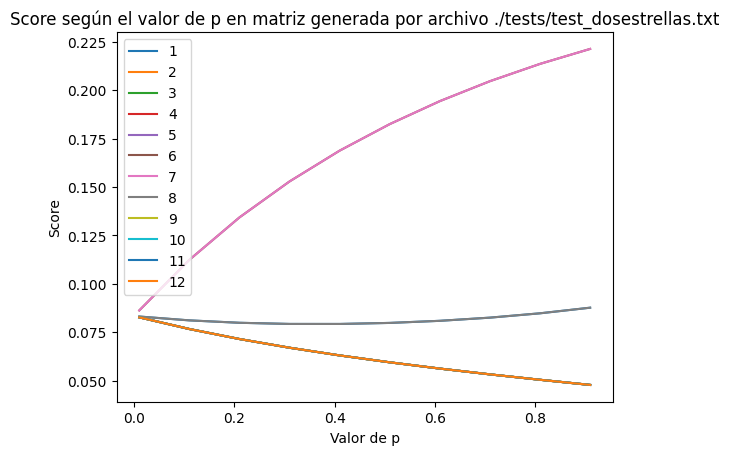

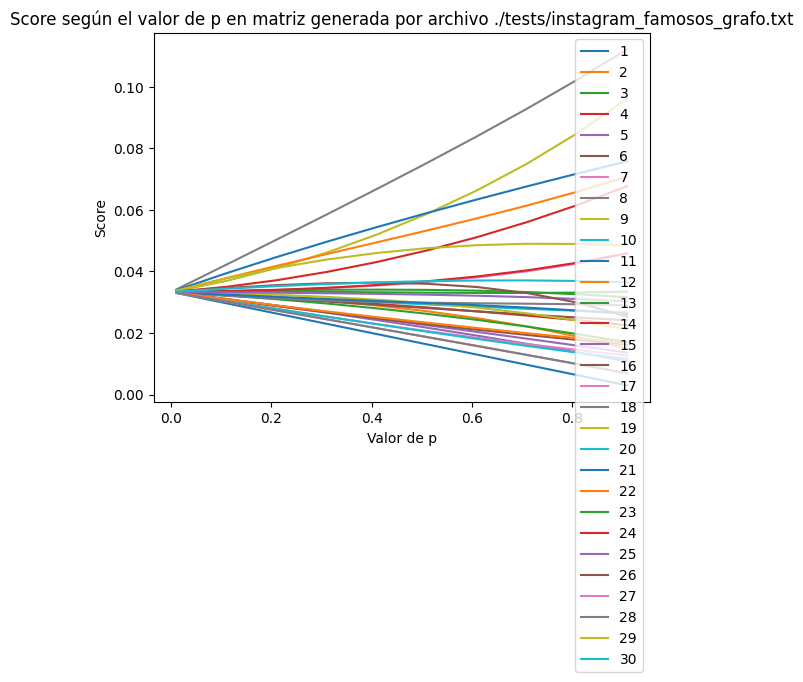

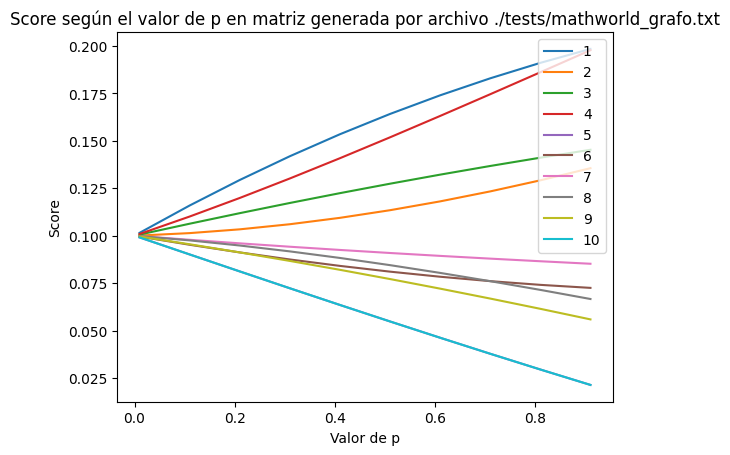

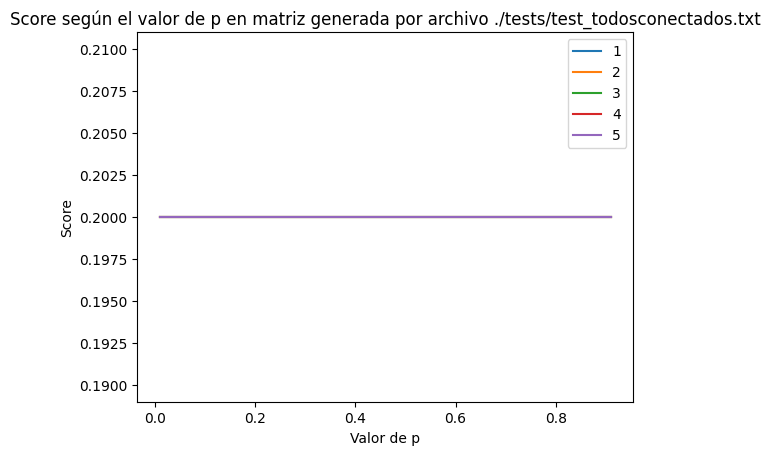

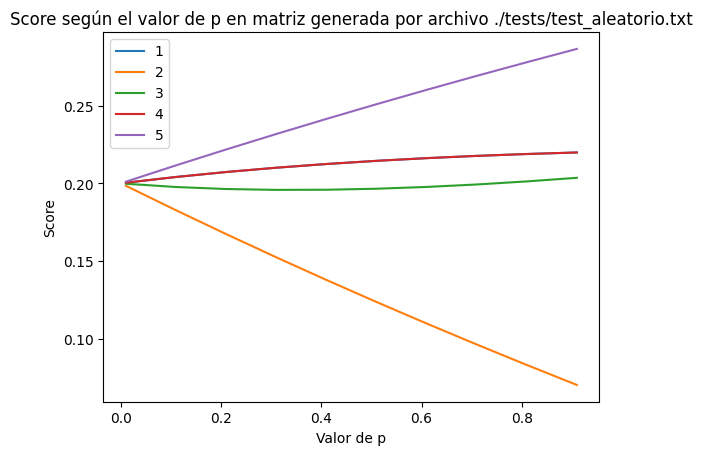

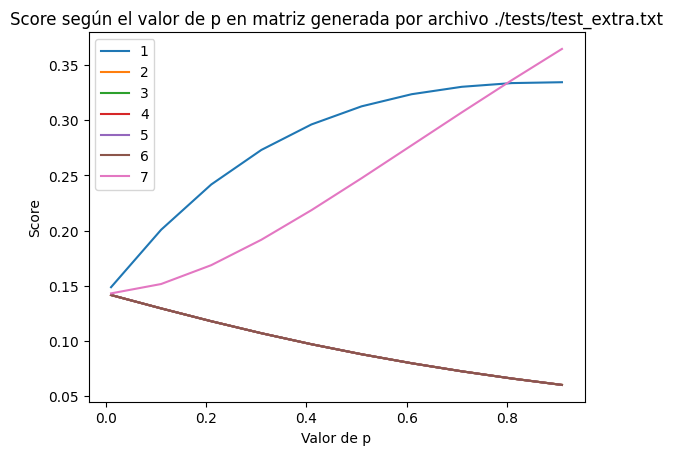

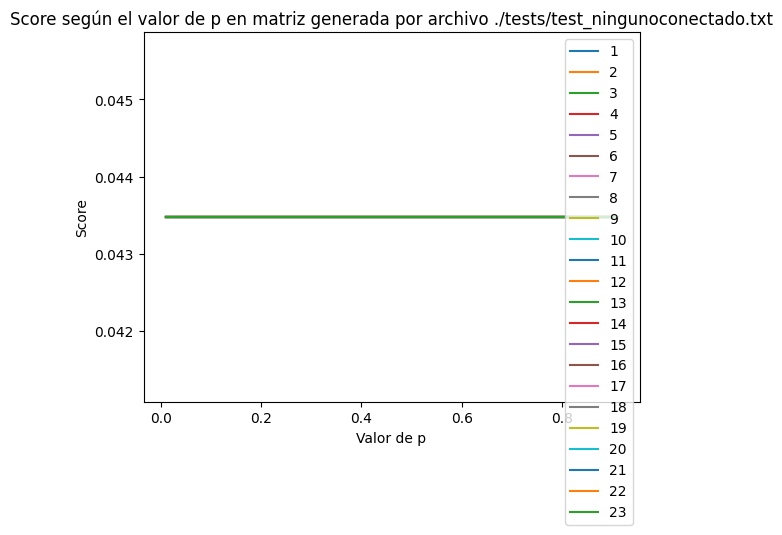

In [ ]:
def graficarCualitativo(archivo_test):
    W = leer_archivo(archivo_test)
    x = np.arange(0.01, 1, 0.1)

    for i in range(np.shape(W)[0]):
      # Obtengo todos los scores de cada nodo a medida que aumento el p
      scores_i = []
      for j in range(len(x)):
        # Dejo el nodo i fijo, calculo su score para cada p y los guardo en scores_i
        p_actual=x[j]
        rnk, scr = calcularRanking(W,p_actual)
        scores_i.append(scr[i])
      plt.plot(x, scores_i, label=str(i+1))
      plt.legend()

    plt.xlabel("Valor de p")
    plt.ylabel("Score")
    plt.title(f'Score según el valor de p en matriz generada por archivo {archivo_test}')
    plt.show()

for archivo_test in archivos_test:
    graficarCualitativo(archivo_test)

Se observa una dispersión de los datos a medida que aumenta p. Generalmente, los nodos que empiezan rankeados primeros aumentan en puntaje y los que empiezan rankeados últimos decrecen en puntaje. Dos nodos que tienen igual puntaje para algún p tendrán igual puntaje para todo p, lo cual explica la superposición de lineas en los gráficos.

### Dos estrellas

Para el caso **test_dosestrellas.txt** se pregunta:

¿Cuál es la mínima cantidad de links que se deben agregar para que la pagina correspondiente al nodo 1 quede primera en el ranking? ¿ Cómo se modificó la conectividad? Analizar.

Para hallar la mínima cantidad de links, encontramos que la forma más eficiente es simplemente haciendo más importante al nodo 1.

Proponemos un algoritmo simple de esta forma:

*Mientras que el nodo 1 no tenga el mayor puntaje:*

$ \hspace{0.5cm} $ *Conectar con el 1 al nodo con mayor puntaje que no sea 1, y que no esté ya conectado con él*


Veamos como evoluciona el score:

[ 7  6  8  1  9 12 11 10  5  4  3  2]


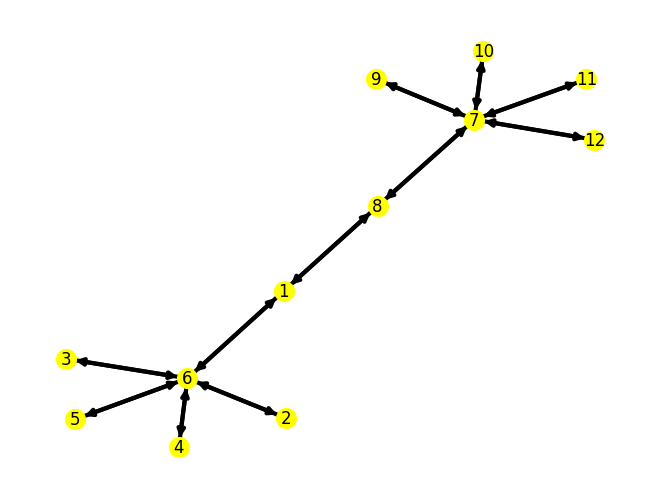

In [ ]:
archivo_test = './tests/test_dosestrellas.txt'

W = leer_archivo(archivo_test)
p = 0.9
rnk, scr = calcularRanking(W, p)
print(rnk)
dibujarGrafo(W, print_ejes=False)


[ 6  7  1  8  5  4  3  2 11 10  9 12]


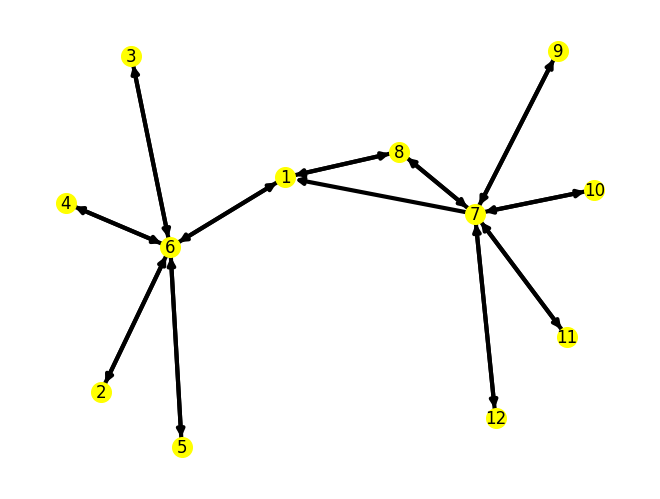

In [ ]:
# Conecto el nodo 7 con el 1
W[0,6] = 1 

rnk, scr = calcularRanking(W, p)
print(rnk)
dibujarGrafo(W, print_ejes=False)


[ 6  7  1  8  5  4  3  2 12 11 10  9]


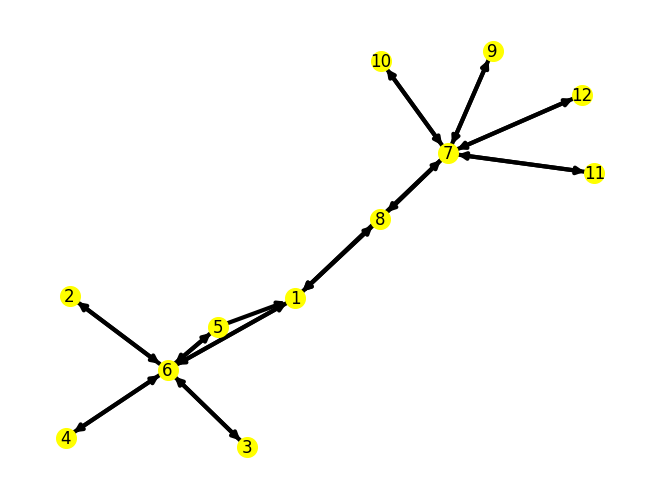

In [ ]:
# Conecto el nodo 5 con el 1
W[0,4] = 1 
rnk, scr = calcularRanking(W, p)
print(rnk)
dibujarGrafo(W, print_ejes=False)


[ 6  7  1  8  5  4  3  2 12 11 10  9]


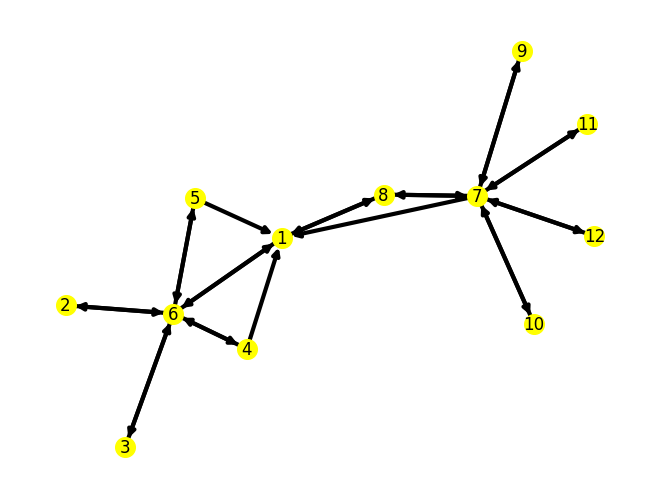

In [ ]:
# Conecto el nodo 4 con el 1
W[0,3] = 1 
rnk, scr = calcularRanking(W, p)
print(rnk)
dibujarGrafo(W, print_ejes=False)

[ 7  6  1  8  5  4  3  2 12 11 10  9]


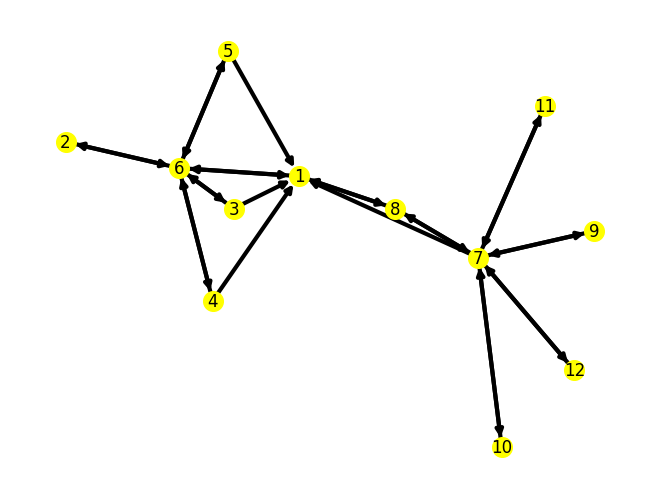

In [ ]:
# Conecto el nodo 3 con el 1
W[0,2] = 1 
rnk, scr = calcularRanking(W, p)
print(rnk)
dibujarGrafo(W, print_ejes=False)

[ 1  6  7  8  5  4  3  2 12 11 10  9]


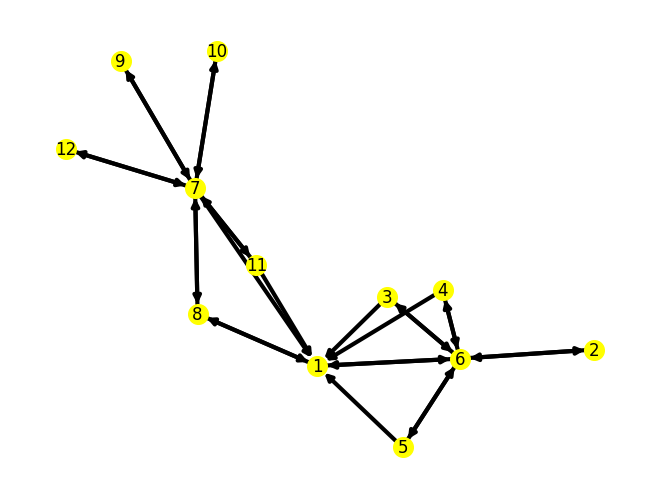

In [ ]:
# Conecto el nodo 11 con el 1
W[0,10] = 1 
rnk, scr = calcularRanking(W, p)
print(rnk)
dibujarGrafo(W, print_ejes=False)

Finalmente, en 5 pasos pudimos hacer que el nodo 1 tenga el mayor puntaje